In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import check_random_state

train_samples = 5_000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation].astype(np.float32)
y = y[permutation].astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000
)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.reshape(X_train, newshape=[X_train.shape[0], 1, 28, 28])
X_test = np.reshape(X_test, newshape=[X_test.shape[0], 1, 28, 28])

ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))
# y_train = ohe.transform(y_train.reshape(-1, 1))
# y_test = ohe.transform(y_test.reshape(-1, 1))

OneHotEncoder()

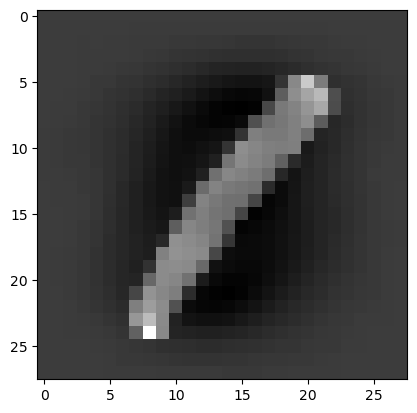

In [2]:
from matplotlib import pyplot as plt

img = X_train[6].reshape([28, 28, 1]).copy()
plt.imshow(img, cmap='gray')

In [3]:
from lab1.numpy_src.activations import Sigmoid, Softmax, Relu
from lab1.numpy_src.layers import Conv2D, MaxPooling, FC, Flatten, BatchNormLayer, Dropout, BatchNorm2D
from lab1.numpy_src.base import Module, Sequential
from lab1.numpy_src.loss import CrossEntropyLoss
from lab1.numpy_src.optim import SGD, AdaSmooth
from lab1.numpy_src.models.alexnet import AlexNet

#
# class Model(Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.layers = [
#             Sequential('block1', [
#                 Conv2D(name="conv1", in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1),  # 1*28*28
#             MaxPooling('pool1', ksize=2, stride=2),  # 6*14*14
#             Relu(name='relu')
#             ]),
#
#             Conv2D(name="conv2", in_channels=6, out_channels=12, kernel_size=3, stride=1, padding=1),
#             MaxPooling('pool2', ksize=2, stride=2),  # 12*7*7
#             Relu(name='relu2'),
#
#             Flatten('flat'),
#             FC(name="full1", in_channels=37632, out_channels=256),
#             Relu(name="sigmoid1"),
#             BatchNormLayer(name='bn2', dims=256),
#             FC(name="full3", in_channels=256, out_channels=10),
#             Softmax('softmax')
#         ]

class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = [
            Conv2D(name='conv1', in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
            Relu(name='relu1'),
            BatchNorm2D(name='bn2', n_channels=8),
            # Dropout(name='drop', prob=0.8),
            Conv2D(name='conv2', in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1),
            Relu(name='relu2'),
            BatchNorm2D(name='bn2', n_channels=8),
            MaxPooling(name='pooling2', ksize=3, stride=1),
            Flatten('flat'),
            FC(name="full1", in_channels=5408, out_channels=10),
            # Relu(name="relu2"),
            # BatchNormLayer(dims=256, name='bn1'),
            # FC(name="full2", in_channels=256, out_channels=128),
            # Relu(name="relu3"),
            # BatchNormLayer(dims=128, name='bn2'),
            # FC(name="full3", in_channels=128, out_channels=10),
            Softmax('softmax')
        ]

model = AlexNet()

In [4]:
model.train()
out = model.forward(np.random.random((1, 3, 227, 227)))
out
# out = model.forward(np.random.randn(1, 1, 28, 28))
# out

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

In [5]:
model.params

[[{'weights': {'value': array([[[[-2.49945329e-02,  7.72678588e-02,  5.59233822e-01, ...,
              -1.38466851e+00, -1.27105517e+00, -2.43270579e+00],
             [-1.12234628e+00,  5.51240119e-01,  1.03330256e+00, ...,
               1.01913710e+00,  1.30523130e+00,  6.75309780e-01],
             [-9.67217847e-02, -7.75427013e-01,  7.71424329e-01, ...,
              -5.84978349e-01, -5.53708982e-01,  7.41520293e-01],
             ...,
             [-9.25307245e-01,  8.56443422e-01, -2.28907679e+00, ...,
              -2.54323992e-01,  4.05266494e-01, -6.95376248e-01],
             [ 1.39512291e+00,  1.24285382e-01,  1.84269812e+00, ...,
               7.63247309e-01,  1.46768434e+00, -2.48750093e-01],
             [ 9.27093592e-01, -3.50701914e-01, -9.76862790e-01, ...,
              -9.42259180e-01,  1.56443330e+00, -7.16314930e-01]],
    
            [[-1.86355861e+00,  4.33247617e-01, -9.56318086e-01, ...,
               7.16219879e-01,  1.32887935e+00, -1.57839898e+00],
    

In [6]:
from lab1.numpy_src.loss import MSELoss

cel = CrossEntropyLoss()
crit = AdaSmooth(model.layers, lr=0.0005)

In [7]:
# from lab1.CarDataset import CarDataset
# from lab1.tn3.data import Dataset, Dataloader
#
# dataset = CarDataset('C:\\MySpace\\Projects\\PTDL\\lab1\\data\\LR1-1', 'cars_train', (227, 227))
# dataset_train, dataset_test = dataset.split_dataset(train_part=0.8)
# dataloader_train = Dataloader(dataset=dataset_train, batch_size=8, shuffle=True)
# dataloader_test = Dataloader(dataset=dataset_test, batch_size=8)


In [8]:
from lab1.numpy_src.data import Dataset, Dataloader

dataset_train = Dataset(data=X_train, target=y_train)
dataloader_train = Dataloader(dataset=dataset_train, batch_size=8, shuffle=True)


dataset_test = Dataset(data=X_test, target=y_test)
dataloader_test = Dataloader(dataset=dataset_test, batch_size=8)

In [9]:
from tqdm import tqdm
import cv2

def accuracy(pred, true):
    pred_int = np.argmax(pred, axis=1)
    return np.sum(pred_int == true) / pred.shape[0]

def convert_img(imgs):
    new_imgs = list()
    for img in imgs:
        img = img.reshape((28, 28, 1))
        img = np.concatenate([img, img, img], axis=2)
        img = np.array(cv2.resize(img, dsize=(227, 227)), dtype='float64')
        img = img.reshape(3, 227, 227)
        new_imgs.append(np.expand_dims(img, axis=0))
    return np.concatenate(new_imgs, axis=0)

def train_epoch(epoch: int):
    model.train()
    full_loss = 0
    with tqdm(total=len(dataloader_train)) as t:
        for j, samples in enumerate(dataloader_train):
            data, targets = samples
            crit.zero_grad()
            data = convert_img(data)
            out = model.forward(data / 255)
            lbl_ohe = np.zeros_like(out)
            lbl_ohe[list(range(out.shape[0])), targets] = 1
            loss, grad = cel(out, targets)
            full_loss += loss
            model.backward(grad)
            crit.update()
            t.update(1)
            t.set_description(f'Train epoch: {epoch} | Loss: {full_loss / (j + 1)}')

def evaluate(epoch: int):
    acc = 0
    model.eval()
    with tqdm(total=len(dataloader_test)) as t:
        for j, samples in enumerate(dataloader_test):
            data, targets = samples
            crit.zero_grad()
            converted = convert_img(data)
            # data = data.astype('float64')
            # converted = data
            out = model.forward(converted / 255)
            acc += accuracy(out, targets)
            t.update(1)
            t.set_description(f'Test epoch: {epoch} | Accuracy {acc / (j + 1)}')

for i in range(15):
    train_epoch(i + 1)
    evaluate(i + 1)

Train epoch: 1 | Loss: 1.3407220876930872: 100%|██████████| 625/625 [1:20:36<00:00,  7.74s/it]
Test epoch: 1 | Accuracy 0.805: 100%|██████████| 125/125 [01:30<00:00,  1.38it/s]             
Train epoch: 2 | Loss: 1.0409938222221986:   1%|          | 4/625 [00:44<1:54:19, 11.05s/it]


KeyboardInterrupt: 

In [ ]:
# 30 эпох, 82.7% точность, окно 10, 1 сверточный слой
# 30 эпох, 85.3% точность, окно 30, 1 сверточный слой
# 60 эпох, 84.9% точность, окно 30, 2 сверточных слоя


In [ ]:
model.params

In [ ]:
import numpy as np
test_arr = np.random.randn(1, 1, 28, 28)
grad_arr = np.random.randn(1, 3, 28, 28)

np_conv = Conv2D(name='conv_test', in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
np_conv.forward(test_arr)
np_grad = np_conv.backward(grad_arr)

from torch import nn
import torch

torch_conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
torch_out = torch_conv(torch.autograd.Variable(torch.tensor(test_arr, dtype=torch.float32, requires_grad=True)))
loss = torch_out - torch.zeros_like(torch_out)
loss.backward()
np_grad.shape, torch_out.grad

In [ ]:
k = 465

model.eval()
# print(convert_img(X_test[k]).shape)
out = model.forward(convert_img(X_test[k]).astype('float64') / 255)
out.argmax(), y_test[k]

In [ ]:
import cv2
from PIL import Image
from lab1.numpy_src.models.alexnet import AlexNet

alex = AlexNet()

img = dataloader_train[0][0][0].reshape((28, 28, 1))
img = np.concatenate([img, img, img], axis=2)
img = cv2.resize(img, dsize=(224, 224))
plt.imshow(img)

In [ ]:
img = np.expand_dims(img.reshape(3, 224, 224), axis=0)
alex.forward(img)

In [1]:
from mat4py import loadmat
import os
anno = loadmat(os.path.join('C:\\MySpace\\Projects\\PTDL\\lab1\\data\\LR1-1', 'cars_meta.mat'))

In [2]:
anno['class_names']

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi A5 Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi V8 Sedan 1994',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi TT Hatchback 2011',
 'Audi S6 Sedan 2011',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S4 Sedan 2012',
 'Audi S4 Sedan 2007',
 'Audi TT RS Coupe 2012',
 'BMW ActiveHybrid 5 Sedan 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'BMW 3 Series Sedan 2012',
 'BMW 3 Series Wagon 2012',
 'BMW 6 Series Convertible 2007',
 'BMW X5 SUV 2007',
 'BMW X6 SUV 2012',
 'BMW M3 Coupe 2012',
 'BMW M5 Sedan 2010',
 'BMW M6 Convertible 2010',
 'BMW X3

In [ ]:
dataset_train[0][0].shape